# Classification Task

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Set the seaborn visualization style
sns.set()

In [2]:
import os
#print("Current Working Directory:", 
#os.getcwd()
#print("Python Path:", sys.path)

# Read the dataset

In [4]:
# Read the dataset
df = pd.read_csv('BAJFINANCE_EQ.csv', index_col='Date ')

In [5]:
# Make the copy of the data. We will work on the copied data.
data = df.copy()

In [6]:
# Inspect the data
data.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
27-Sep-24,EQ,7780.00,7810.00,7711.00,7768.40,7748.00,7756.0,7763.32,8192.0,6187.8,1178131.0,9.146206e+09,111773.0
26-Sep-24,EQ,7640.00,7779.40,7587.55,7623.90,7750.50,7768.4,7703.91,8192.0,6187.8,1668165.0,1.285140e+10,135704.0
25-Sep-24,EQ,7545.00,7640.00,7498.05,7554.20,7609.05,7623.9,7594.79,8192.0,6187.8,1272038.0,9.660857e+09,115651.0
24-Sep-24,EQ,7597.00,7603.45,7483.90,7595.10,7540.05,7554.2,7540.36,8192.0,6187.8,1069540.0,8.064716e+09,108687.0
23-Sep-24,EQ,7625.75,7635.95,7531.70,7582.45,7590.00,7595.1,7583.00,8192.0,6187.8,573497.0,4.348827e+09,63656.0


In [7]:
# Check the shape of the data
data.shape

(249, 13)

# Generate Target Values

In [9]:
# Generate log returns
data['returns'] = np.log(data['close '] / data['close '].shift(1))

In [10]:
# Create target values
data['target'] = np.where(data.returns.shift(-1) > 0, 1, 0)

In [11]:
# Count the values in the target column
data['target'].value_counts()

0    126
1    123
Name: target, dtype: int64

In [12]:
features = ['Volume', 'returns']
label = 'target'

# Feature Selection



In [13]:
data['target'].value_counts()

0    126
1    123
Name: target, dtype: int64

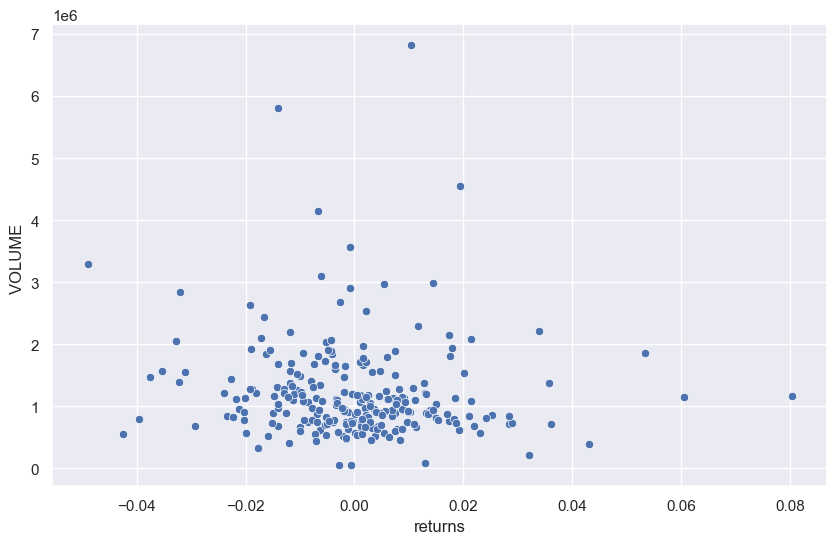

In [15]:
# Scatter plot of Close and Volume
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['returns'], y=data['VOLUME ']);

# Feature Extraction

Our intuition says that only these two features might not be able to capture the intricacies of the stock movement. We need more features. What we can do to generate more features? The answer is, create or extract new features based on the existing ones.

Let's try to create new features. We will consider the following quantitative features.

    Rolling standard deviation
    Rolling moving average of close price
    Rolling percentage change
    Rolling moving average of volume
    Difference between close and open



In [16]:
# Creating features
features_list = []

# SD based features
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['close '].rolling(window=i).std()
    features_list.append(col_name)
    
# MA based features
for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['close '].rolling(window=i).mean()
    features_list.append(col_name)
    
# Daily pct change based features
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['close '].pct_change().rolling(i).sum()
    features_list.append(col_name)
    
# Feature based on volume
col_name = 'vma_4'
data[col_name] = data['VOLUME '].rolling(4).mean()
features_list.append(col_name)

# Intraday movement
col_name = 'co'
data[col_name] = data['close '] - data['OPEN ']
features_list.append(col_name)

In [17]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'vma_4',
 'co']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 27-Sep-24 to 28-Sep-23
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series         249 non-null    object 
 1   OPEN           249 non-null    float64
 2   HIGH           249 non-null    float64
 3   LOW            249 non-null    float64
 4   PREV. CLOSE    249 non-null    float64
 5   ltp            249 non-null    float64
 6   close          249 non-null    float64
 7   vwap           249 non-null    float64
 8   52W H          249 non-null    float64
 9   52W L          249 non-null    float64
 10  VOLUME         249 non-null    float64
 11  VALUE          249 non-null    float64
 12  No of trades   249 non-null    float64
 13  returns        248 non-null    float64
 14  target         249 non-null    int32  
 15  std_5          245 non-null    float64
 16  std_10         240 non-null    float64
 17  std_15         235 non-null    float64
 18  m

In [19]:
data.isna().sum()

series            0
OPEN              0
HIGH              0
LOW               0
PREV. CLOSE       0
ltp               0
close             0
vwap              0
52W H             0
52W L             0
VOLUME            0
VALUE             0
No of trades      0
returns           1
target            0
std_5             4
std_10            9
std_15           14
ma_10             9
ma_15            14
ma_20            19
ma_25            24
pct_3             3
pct_6             6
pct_9             9
vma_4             3
co                0
dtype: int64

In [20]:
# Removing nan values
data.dropna(inplace=True)

In [21]:
data[features_list + ['target']].head()

,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,target
Date,,,,,,,,,,,,,
26-Aug-24,169.025089,230.324511,231.482846,7146.105,7228.180000,7296.8925,7369.418,-0.040850,-0.080338,-0.075237,1605597.50,2.35,0
23-Aug-24,127.263057,254.450656,239.913859,7087.975,7170.670000,7254.5625,7328.612,-0.023966,-0.098336,-0.071632,1100319.00,-19.15,1
22-Aug-24,73.685604,269.061072,252.216253,7037.845,7125.023333,7212.2250,7287.620,-0.017540,-0.064941,-0.078018,1070137.50,-6.40,0
21-Aug-24,54.510033,267.240654,263.082401,6981.430,7084.343333,7167.4375,7252.078,-0.006343,-0.047193,-0.086680,719439.75,13.40,0
20-Aug-24,21.167446,242.992233,274.812914,6918.270,7049.700000,7135.2725,7218.798,-0.002025,-0.025991,-0.100361,734143.75,74.85,0


# Generate Training & Testing Datasets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test, y_train, y_test = train_test_split(data[features_list].iloc[:-1],
                                                    data.iloc[:-1]['target'],
                                                    test_size= 0.25, 
                                                    shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((168, 12), (168,), (56, 12), (56,))

# Define a Model

In [24]:
# Import necessary packages
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Create a model
model = DecisionTreeClassifier(max_depth=3, random_state=1)

In [23]:
# model = DecisionTreeClassifier(class_weight=None, 
#                                criterion='gini', 
#                                max_depth=3,
#                                max_features=None, 
#                                max_leaf_nodes=None,
#                                min_samples_leaf=5,
#                                min_samples_split=2,
#                                min_weight_fraction_leaf=0.0, 
#                                random_state=None, 
#                                splitter='best')

# Train the Model

In [26]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

# Predict using the Training Model

In [27]:
# Predict on a train dataset
y_pred_train = model.predict(X_train)

In [28]:
print('Model accuracy on training data:', model.score(X_train, y_train))

Model accuracy on training data: 0.8928571428571429


In [29]:
# Predict on a test dataset
y_pred = model.predict(X_test)

In [30]:
print('Model accuracy on testing data:', model.score(X_test, y_test))

Model accuracy on testing data: 0.8571428571428571


In [31]:
model.predict_proba(X_test)

array([[0.03846154, 0.96153846],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.10526316, 0.89473684],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [0.03846154, 0.96153846],
       [0.10526316, 0.89473684],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [0.03846154, 0.96153846],
       [0.

# Evaluate the Model

In [32]:
# Another method to calculate accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy on training data:', accuracy_score(y_train, y_pred_train))
print('Model accuracy on testing data:', accuracy_score(y_test, y_pred))

Model accuracy on training data: 0.8928571428571429
Model accuracy on testing data: 0.8571428571428571


In [33]:
# Importing necessary packages
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Printing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[24  1]
 [ 7 24]]


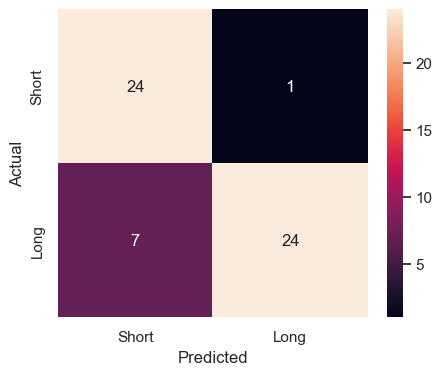

In [35]:
# Plotting the Confustion matrix
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, index=['Short', 'Long'], columns=['Short', 'Long'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.96      0.77      0.86        31

    accuracy                           0.86        56
   macro avg       0.87      0.87      0.86        56
weighted avg       0.88      0.86      0.86        56



# Visualize a tree

In [37]:
from sklearn.tree import plot_tree

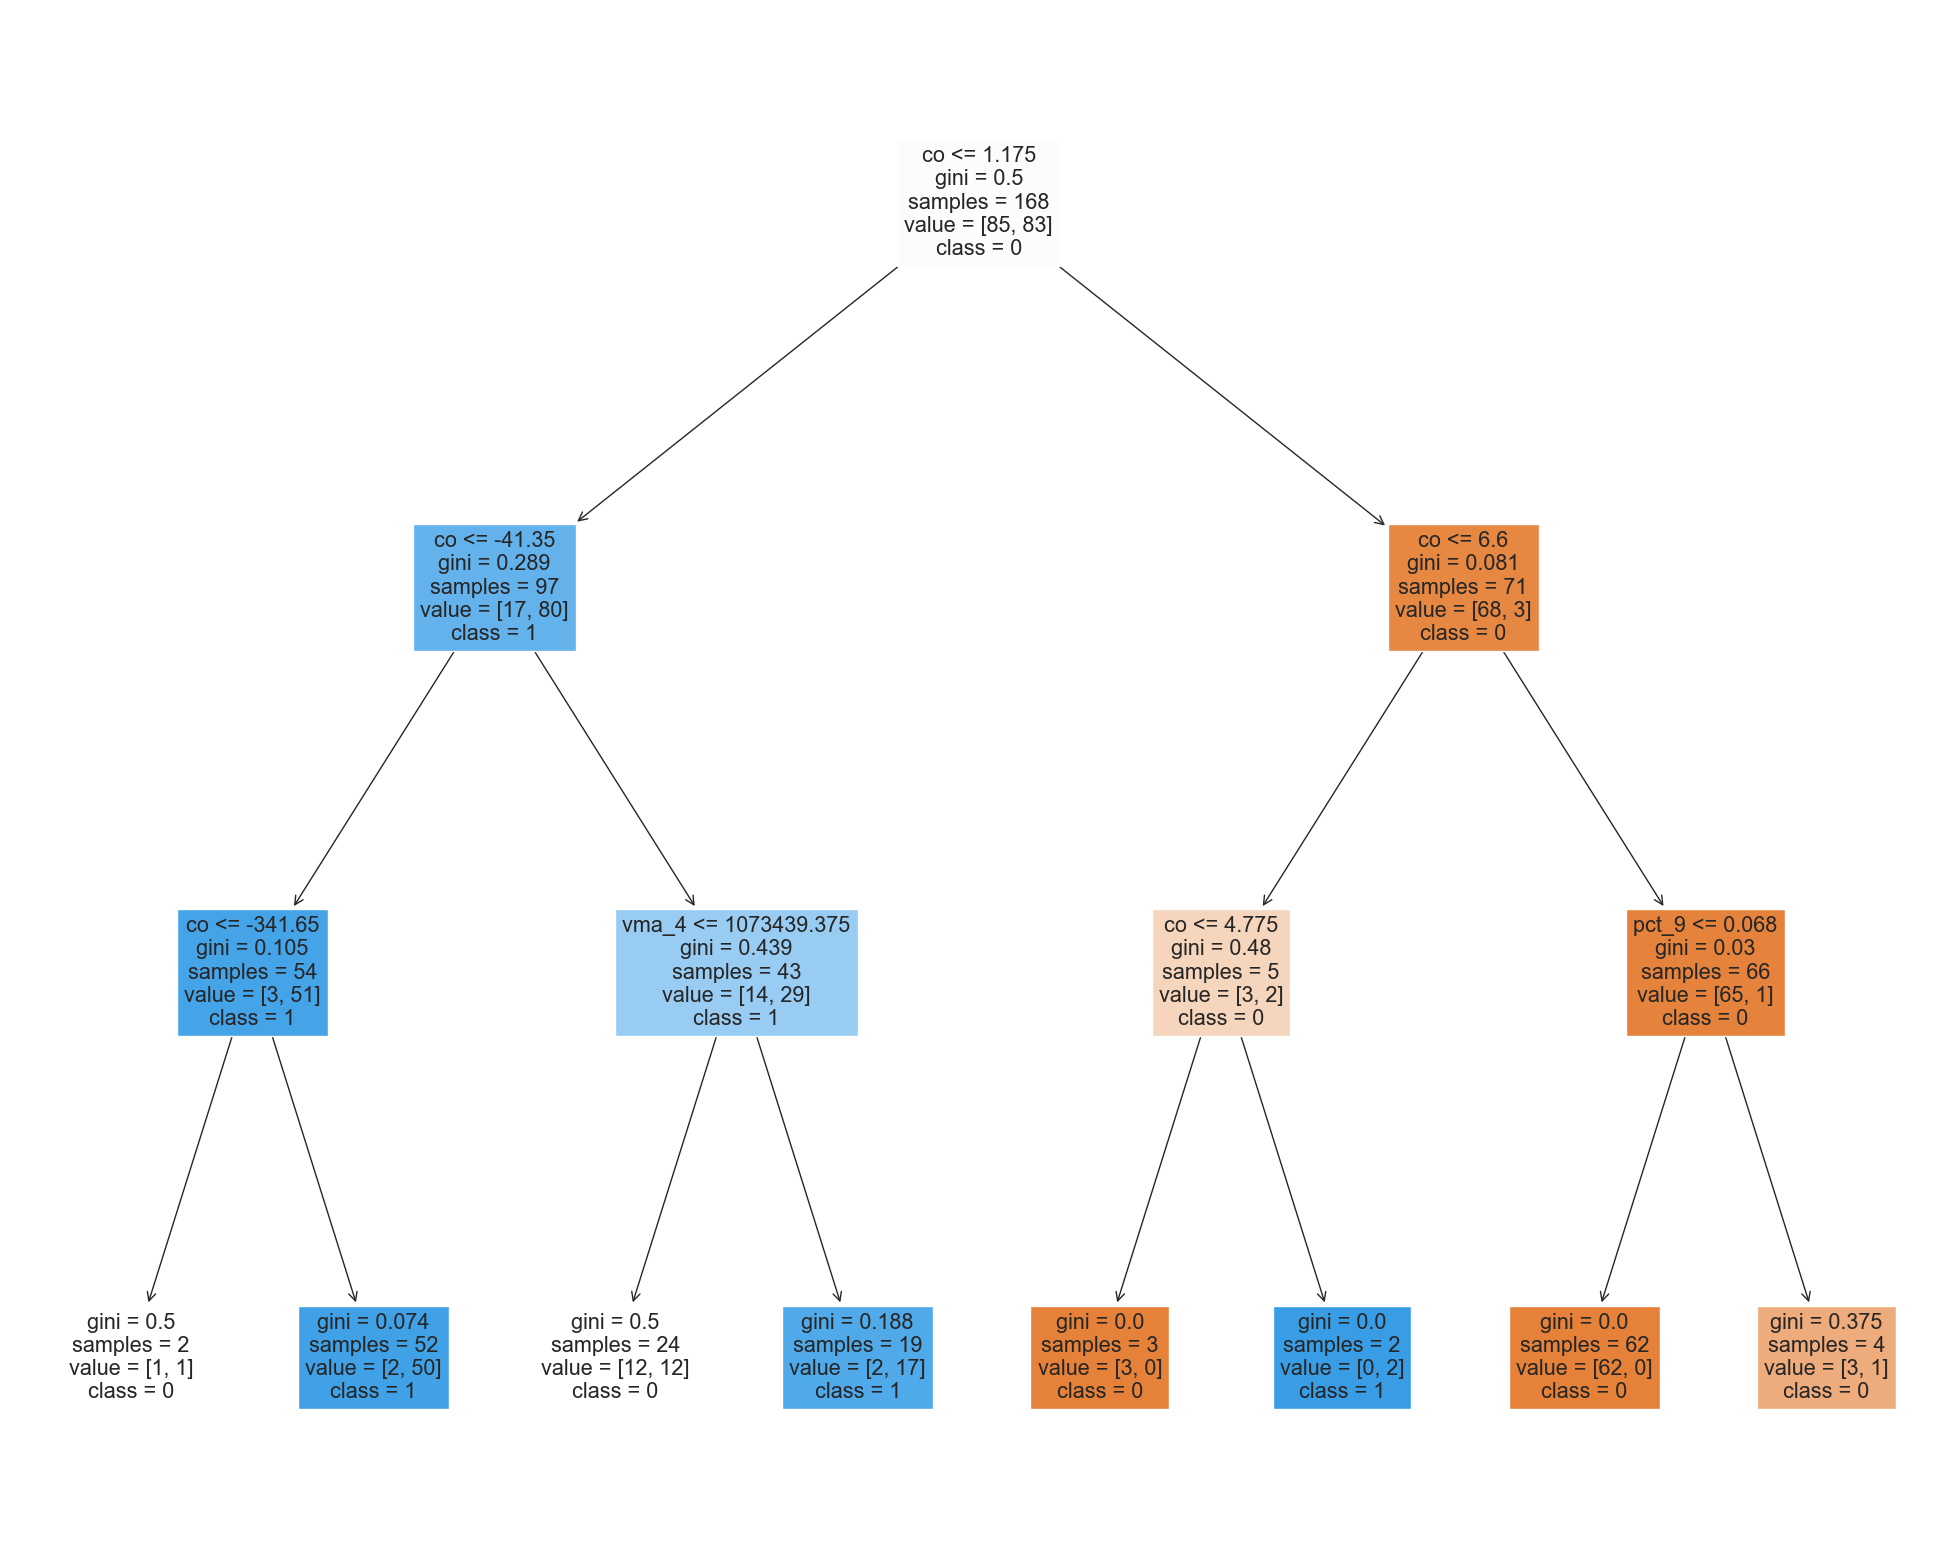

In [38]:
fig = plt.figure(figsize=(25,20))

_ = plot_tree(model, 
              feature_names=features_list,
              class_names=['0','1'],
              filled=True)

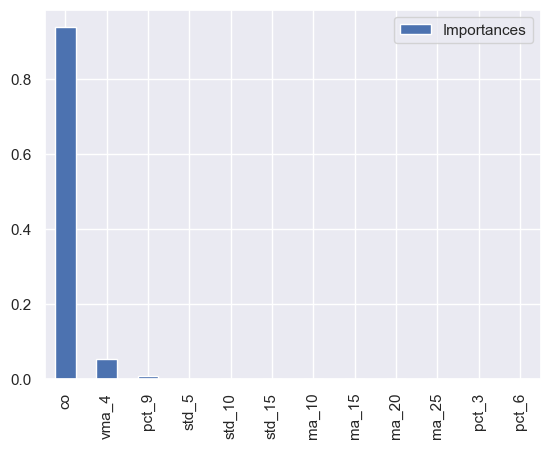

In [39]:
plot_df = pd.DataFrame({"Importances": model.feature_importances_}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();

# Random Forest Model

In [40]:
# From required libraries
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Define a model
model = RandomForestClassifier(n_estimators=20, 
                               max_depth=3,
                               max_leaf_nodes=5, 
                               random_state=1, 
                               max_features=5, 
                               min_samples_leaf=1)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=5, max_leaf_nodes=5,
                       n_estimators=20, random_state=1)

In [42]:
# Predict on a train dataset
y_pred_train = model.predict(X_train)

In [43]:
print('Model accuracy on training data:', model.score(X_train, y_train))

Model accuracy on training data: 0.9285714285714286


In [44]:
# Predict on a test dataset
y_pred = model.predict(X_test)

In [45]:
print('Model accuracy on testing data:', model.score(X_test, y_test))

Model accuracy on testing data: 0.8571428571428571


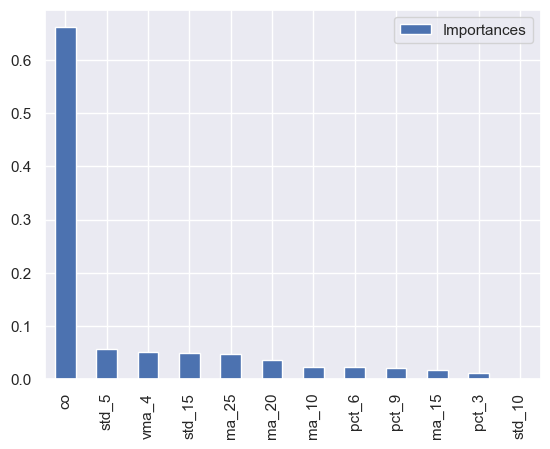

In [46]:
imp_features = model.feature_importances_

plot_df = pd.DataFrame({"Importances": imp_features}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();